In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
'''
Remove NaNs
 - There are only 84 rows with NaNs, so we can drop them
'''

data = pd.read_csv('../ads_data.csv')
print(f'Null counts:\n\n{data.isnull().sum()}')
data_dropna = data.copy().dropna()
print(f'\nRemoved {len(data)-len(data_dropna)} rows with nulls')

Null counts:

bibcode           0
author_count      0
aff               0
bibstem           0
citation_count    0
arxiv_class       0
year              0
read_count        0
download_count    0
dtype: int64

Removed 0 rows with nulls


In [78]:
'''
Count empty 'affiliation' lists
 - Can't clean into lists because saving as csv will convert back to strings
 - There are 124 rows with empty lists, which might be too many to drop. 
'''

count = 0
for i in range(len(data_dropna)):
    aff_list = data_dropna['aff'].iloc[i].replace('[','').replace(']','').replace('\'','').split(', ')
    if np.all([x == '-' for x in aff_list]):
        count += 1
    #data_dropna['aff'].iloc[i] = aff_list 
print(f'Number of empty affiliation lists: {count}')

Number of empty affiliation lists: 100


In [79]:
'''
Normalization
'''
data_norm = data_dropna.copy()
numerical_cols = data.select_dtypes(include=[np.float64, np.int64]).columns
for col in numerical_cols:
    data_norm[col] = (data[col] - data[col].mean()) / data[col].std()
data_norm.to_csv('../ads_data_clean.csv', index=False)

In [80]:
data_clean = pd.read_csv('../ads_data_clean.csv')
data_clean


,bibcode,author_count,aff,bibstem,citation_count,arxiv_class,year,read_count,download_count
0,2021arXiv210508081T,-0.340403,"['-', '-']","['arXiv', 'arXiv2105']",-0.591044,"['astro-ph.EP', 'astro-ph.IM', 'physics.pop-ph']",0.409914,15.771370,0.682193
1,2020A&A...641A...6P,0.429444,"['-', ""Institut d'Astrophysique Spatiale, CNRS...","['A&A', 'A&A...641']",11.308304,['astro-ph.CO'],0.199696,5.441863,4.138886
2,2024ApJ...962L..15J,-0.340403,"['Southwest Research Institute, Boulder, CO 80...","['ApJL', 'ApJL..962']",-0.591044,['astro-ph.SR'],1.040568,1.305417,-0.946325
3,2016A&A...594A..13P,0.771599,"['-', 'School of Physics and Astronomy, Cardif...","['A&A', 'A&A...594']",9.613994,['astro-ph.CO'],-0.641175,6.197062,3.979370
4,2013A&A...558A..33A,-0.156495,"['-', 'Max-Planck-Institut für Astronomie, Kön...","['A&A', 'A&A...558']",8.318777,['astro-ph.IM'],-1.271829,2.311697,0.576892
...,...,...,...,...,...,...,...,...,...
994,2022ApJ...927..192Y,-0.289080,"['Department of Physics and Astronomy, Texas A...","['ApJ', 'ApJ...927']",-0.486578,"['astro-ph.GA', 'astro-ph.HE', 'astro-ph.IM']",0.620132,-0.499898,-0.475598
995,2022A&A...659A.191E,-0.143665,"['European Southern Observatory, Karl-Schwarzs...","['A&A', 'A&A...659']",-0.458013,"['astro-ph.GA', 'astro-ph.IM']",0.620132,-0.446513,-0.427639
996,2022ApJS..261....2K,-0.199265,"['Eureka Scientific, 2452 Delmer Street, Suite...","['ApJS', 'ApJS..261']",-0.530650,"['astro-ph.GA', 'astro-ph.HE']",0.620132,-0.571945,-0.631465
997,2024A&A...682L...3P,0.861414,"['Max-Planck-Institut für Radioastronomie, Auf...","['A&A', 'A&A...682']",-0.582883,"['astro-ph.HE', 'astro-ph.GA']",1.040568,-0.757056,-0.852493


Numerical Columns: Index(['author_count', 'citation_count', 'year', 'read_count',
       'download_count'],
      dtype='object')


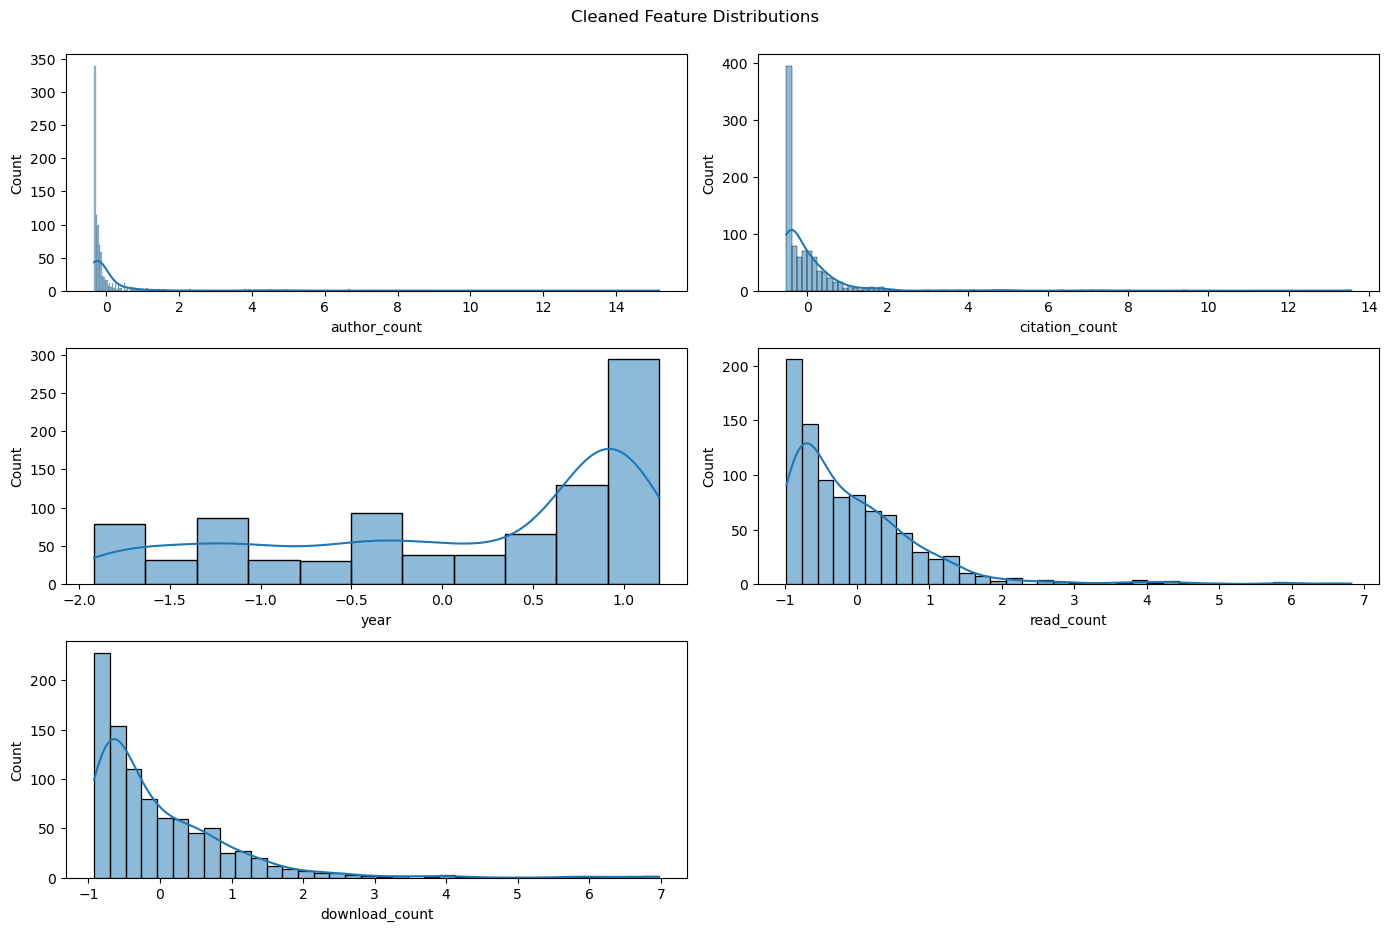

In [46]:
'''
Perform plots again on cleaned data
'''

# Plot feature distributions
data_clean = pd.read_csv('../ads_data_clean.csv')
numerical_cols = data_clean.select_dtypes(include=[np.float64, np.int64]).columns
print('Numerical Columns:', numerical_cols)
fig = plt.figure(figsize=(14, len(numerical_cols)*3))
plt.suptitle('Cleaned Feature Distributions')
for idx, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 2, idx)
    sns.histplot(data_clean[col], kde=True)
plt.tight_layout()
fig.subplots_adjust(top=0.95)

In [102]:
'''
Explore affiliations
'''
data_clean = pd.read_csv('../ads_data_clean.csv')
affiliation_counts = {}
for i in range(len(data_clean)):
    aff_list = data_clean['aff'].iloc[i].replace('[','').replace(']','').replace(';','').split(", '")
    aff_list = list(set([aff.replace('\'','') for aff in aff_list]))
    for aff in aff_list:
        if aff in affiliation_counts:
            affiliation_counts[aff] += 1
        else:
            affiliation_counts[aff] = 1
affiliation_counts

{'-': 205,
 'Instituto de Astrofísica de Canarias, C/Vía Láctea s/n, La Laguna, Tenerife, Spain Departamento de Astrofísica, Universidad de La Laguna (ULL), 38206, La Laguna, Tenerife, Spain, "Institut dAstrophysique Spatiale, CNRS, Univ. Paris-Sud, Université Paris-Saclay, Bât. 121, 91405, Orsay Cedex, France"': 3,
 'Dipartimento di Fisica e Scienze della Terra, Università di Ferrara, Via Saragat 1, 44122, Ferrara, Italy Space Science Data Center - Agenzia Spaziale Italiana, Via del Politecnico snc, 00133, Roma, Italy INFN, Sezione di Ferrara, Via Saragat 1, 44122, Ferrara, Italy': 4,
 'INFN - CNAF, viale Berti Pichat 6/2, 40127, Bologna, Italy': 2,
 'AIM, CEA, CNRS, Université Paris-Saclay, Université Paris-Diderot, Sorbonne Paris Cité, 91191, Gif-sur-Yvette, France': 3,
 'Dipartimento di Fisica, Università di Roma Tor Vergata, Via della Ricerca Scientifica, 1, Roma, Italy INFN, Sezione di Roma 2, Università di Roma Tor Vergata, Via della Ricerca Scientifica, 1, Roma, Italy, "Departm

In [105]:
i = 1
print(data_clean['aff'].iloc[i])
print(data_clean['aff'].iloc[i].replace('[','').replace(']','').replace(';','').replace('"',"\'").split(", '"))
aff_list = data_clean['aff'].iloc[i].replace('[','').replace(']','').replace(';','').split(", '")
aff_list = list(set([aff.replace('\'','') for aff in aff_list]))
print(aff_list)


['-', "Institut d'Astrophysique Spatiale, CNRS, Univ. Paris-Sud, Université Paris-Saclay, Bât. 121, 91405, Orsay Cedex, France", 'Département de Physique, École normale supérieure, PSL Research University, CNRS, 24 rue Lhomond, 75005, Paris, France; Institute Lorentz, Leiden University, PO Box 9506, Leiden, 2300 RA, The Netherlands; Institute of Theoretical Astrophysics, University of Oslo, Blindern, Oslo, Norway', 'Kavli Institute for Cosmology Cambridge, Madingley Road, Cambridge, CB3 0HA, UK; Astrophysics Group, Cavendish Laboratory, University of Cambridge, J J Thomson Avenue, Cambridge, CB3 0HE, UK', 'Université de Toulouse, UPS-OMP, IRAP, 31028, Toulouse Cedex 4, France', 'SISSA, Astrophysics Sector, Via Bonomea 265, 34136, Trieste, Italy', 'Department of Physics &amp; Astronomy, University of the Western Cape, Cape Town, 7535, South Africa; INAF - OAS Bologna, Istituto Nazionale di Astrofisica - Osservatorio di Astrofisica e Scienza dello Spazio di Bologna, Area della Ricerca de

In [59]:
'''

'''

'-'